In [2]:
import pandas as pd
import numpy as np
#from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler

np.set_printoptions(threshold=np.inf)

object_user = 's052'

#数据准备
fileName = 's052_200train_verification_results_out.csv'
df = pd.read_csv(fileName)
#正测试样本
df_positive = df[0:200]
#负测试样本
df_negative1 = df[200+(1-1)*350:200+350]   #s002
df_negative2 = df[200+(26-1)*350:200+26*350]  #s032
df_negative3 = df[200+(30-1)*350:200+30*350]  #s036
df_negative4 = df[200+(40-1)*350:200+40*350]  #s047
df_negative = df_negative1.append([df_negative2,df_negative3,df_negative4])

In [4]:
y_true = [1]*200+[0]*1400
y_predict = df_positive['score'].tolist() + df_negative['score'].tolist()

path = './result/'

CMU_SVM_fileName = path + 'SVM_best'+object_user+'_CMU_pred_final.txt'  
df_CMU_SVM = np.loadtxt(CMU_SVM_fileName).tolist()#模型的预测值

CMU_ANN_fileName = path + 'ANN_'+object_user+'_CMU_pred_final.txt'
df_CMU_ANN = np.loadtxt(CMU_ANN_fileName).tolist()#模型的预测值

Hawkes_SVM_fileName = path + 'feature_SVM_best'+object_user+'_Hawkes.txt'
df_Hawkes_SVM = np.loadtxt(Hawkes_SVM_fileName).tolist()

Hawkes_ANN_fileName = path + 'feature_ANN_'+object_user+'_Hawkes.txt'
df_Hawkes_ANN = np.loadtxt(Hawkes_ANN_fileName).tolist()



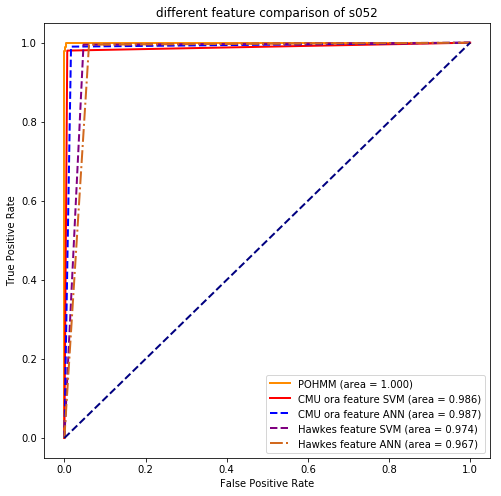

In [6]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
#from sklearn import svm
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
#import numpy as np
#import random

fpr, tpr, threshold = roc_curve(y_true, y_predict)  ###计算真正率和假正率
roc_auc = auc(fpr, tpr)  ###计算auc的值

fpr_CMU_SVM, tpr_CMU_SVM, threshold_CMU_SVM = roc_curve(y_true, df_CMU_SVM)
roc_auc_CMU_SVM = auc(fpr_CMU_SVM, tpr_CMU_SVM)
 
fpr_CMU_ANN, tpr_CMU_ANN, threshold_CMU_ANN = roc_curve(y_true, df_CMU_ANN)
roc_auc_CMU_ANN = auc(fpr_CMU_ANN, tpr_CMU_ANN)

fpr_Hawkes_SVM, tpr_Hawkes_SVM, threshold_Hawkes_SVM = roc_curve(y_true, df_Hawkes_SVM)
roc_auc_Hawkes_SVM = auc(fpr_Hawkes_SVM, tpr_Hawkes_SVM)

fpr_Hawkes_ANN, tpr_Hawkes_ANN, threshold_Hawkes_ANN = roc_curve(y_true, df_Hawkes_ANN)
roc_auc_Hawkes_ANN = auc(fpr_Hawkes_ANN, tpr_Hawkes_ANN)
    
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', ###假正率为横坐标，真正率为纵坐标做曲线
         lw=2, label='POHMM (area = %0.3f)' % roc_auc, linestyle='-')
plt.plot(fpr_CMU_SVM, tpr_CMU_SVM, color='red',
         lw=2, label='CMU ora feature SVM (area = %0.3f)' % roc_auc_CMU_SVM, linestyle='-')
plt.plot(fpr_CMU_ANN, tpr_CMU_ANN, color='blue',
         lw=2, label='CMU ora feature ANN (area = %0.3f)' % roc_auc_CMU_ANN, linestyle='--')
plt.plot(fpr_Hawkes_SVM, tpr_Hawkes_SVM, color='#800080',
         lw=2, label='Hawkes feature SVM (area = %0.3f)' % roc_auc_Hawkes_SVM, linestyle='--')
plt.plot(fpr_Hawkes_ANN, tpr_Hawkes_ANN, color='#D2691E',
         lw=2, label='Hawkes feature ANN (area = %0.3f)' % roc_auc_Hawkes_ANN, linestyle='-.')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([-0.02, 1.05])#横竖增加一点长度 以便更好观察图像
#plt.ylim([-0.02, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('different feature comparison of '+object_user)
plt.legend(loc="lower right")
save_file = object_user+'POHMM_200samples.png'
plt.savefig(save_file,dpi=600)#保存图片，dpi设置分辨率
plt.show()

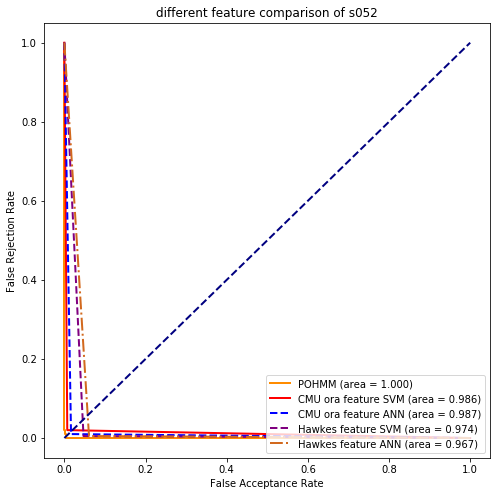

In [7]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
#from sklearn import svm
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
#import numpy as np
#import random

fpr, tpr, threshold = roc_curve(y_true, y_predict)  ###计算真正率和假正率
roc_auc = auc(fpr, tpr)  ###计算auc的值

fpr_CMU_SVM, tpr_CMU_SVM, threshold_CMU_SVM = roc_curve(y_true, df_CMU_SVM)
roc_auc_CMU_SVM = auc(fpr_CMU_SVM, tpr_CMU_SVM)
 
fpr_CMU_ANN, tpr_CMU_ANN, threshold_CMU_ANN = roc_curve(y_true, df_CMU_ANN)
roc_auc_CMU_ANN = auc(fpr_CMU_ANN, tpr_CMU_ANN)

fpr_Hawkes_SVM, tpr_Hawkes_SVM, threshold_Hawkes_SVM = roc_curve(y_true, df_Hawkes_SVM)
roc_auc_Hawkes_SVM = auc(fpr_Hawkes_SVM, tpr_Hawkes_SVM)

fpr_Hawkes_ANN, tpr_Hawkes_ANN, threshold_Hawkes_ANN = roc_curve(y_true, df_Hawkes_ANN)
roc_auc_Hawkes_ANN = auc(fpr_Hawkes_ANN, tpr_Hawkes_ANN)
    
plt.figure(figsize=(8, 8))
plt.plot(fpr, 1- tpr, color='darkorange', ###假正率为横坐标，真正率为纵坐标做曲线
         lw=2, label='POHMM (area = %0.3f)' % roc_auc, linestyle='-')
plt.plot(fpr_CMU_SVM, 1- tpr_CMU_SVM, color='red',
         lw=2, label='CMU ora feature SVM (area = %0.3f)' % roc_auc_CMU_SVM, linestyle='-')
plt.plot(fpr_CMU_ANN, 1- tpr_CMU_ANN, color='blue',
         lw=2, label='CMU ora feature ANN (area = %0.3f)' % roc_auc_CMU_ANN, linestyle='--')
plt.plot(fpr_Hawkes_SVM, 1- tpr_Hawkes_SVM, color='#800080',
         lw=2, label='Hawkes feature SVM (area = %0.3f)' % roc_auc_Hawkes_SVM, linestyle='--')
plt.plot(fpr_Hawkes_ANN, 1- tpr_Hawkes_ANN, color='#D2691E',
         lw=2, label='Hawkes feature ANN (area = %0.3f)' % roc_auc_Hawkes_ANN, linestyle='-.')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([-0.02, 1.05])#横竖增加一点长度 以便更好观察图像
#plt.ylim([-0.02, 1.05])
plt.xlabel('False Acceptance Rate')
plt.ylabel('False Rejection Rate')
plt.title('different feature comparison of '+object_user)
plt.legend(loc="lower right")
save_file = object_user+'POHMM_200samples.png'
plt.savefig(save_file,dpi=600)#保存图片，dpi设置分辨率
plt.show()